In [8]:
import nltk
import numpy
import pandas as pd
import string
import csv
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer


In [9]:
df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/dataset-lyrics-musics-mini.csv") 
print(df)

      cantorId   cantorNome                           musicaNome  \
0            0  david-bowie                               Heroes   
1            0  david-bowie                              Starman   
2            0  david-bowie                         Space Oddity   
3            0  david-bowie                        Life On Mars?   
4            0  david-bowie                          Modern Love   
...        ...          ...                                  ...   
1743         4        ac-dc                         Who Made Who   
1744         4        ac-dc                    Whole Lotta Rosie   
1745         4        ac-dc           You Ain't Got A Hold On Me   
1746         4        ac-dc          You Shook Me All Night Long   
1747         4        ac-dc  You Shook Me All Night Long (Remix)   

                                                  letra  
0     I, I will be king. And you, you will be queen....  
1     Didn't know what time it was,. The lights were...  
2     Gro

In [111]:
#Stop word removal(gereksiz/sık kullanılan kelimelerin çıkarılması) işlemi Yapıldı
nltk.download("stopwords")

stop_words = set(stopwords.words('english'))

stop_words_list = list(stop_words)

print(" İlk 30 ingilizce stopword:")
print(stop_words_list[:30])

 İlk 50 ingilizce stopword:
["they've", 'over', 'whom', 'being', 'don', 'its', 'off', 'y', 'only', 'once', 'above', 'my', 'than', "i'm", "mustn't", "didn't", 'which', "doesn't", 'the', 'at', "don't", "hasn't", 'are', 'of', 'their', 'further', 'theirs', 'themselves', 'here', 'having']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
import pandas as pd
import nltk
import string
from nltk.tokenize import sent_tokenize

# Gerekli NLTK paketi indiriliyor (sadece ilk çalıştırmada gerekir)
nltk.download('punkt')

#  CSV dosyasını okuyoruz (senin verdiğin yol)
df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/dataset-lyrics-musics-mini.csv")

# Noktalama karakterlerini kaldırmak için çeviri tablosu oluşturuluyor
translator = str.maketrans('', '', string.punctuation)

#  Her bir sanatçıyı cümlelere ayırıp noktalama temizleme fonksiyonu
def split_and_clean_sentences(text):
    sentences = sent_tokenize(text)  # Cümlelere ayır
    cleaned = [s.translate(translator) for s in sentences]  # Noktalamayı kaldır
    return cleaned

# 'musicaNome ' sütununu cümlelere ayır ve temizle
df['sentences'] = df['musicaNome'].apply(lambda x: split_and_clean_sentences(str(x)) if pd.notna(x) else [])

# İlk 20 satırdaki cümleleri yazdır
print(df['sentences'].head(20))


0                         [Heroes]
1                        [Starman]
2                   [Space Oddity]
3                   [Life On Mars]
4                    [Modern Love]
5                        [Changes]
6                     [Lets Dance]
7     [The Man Who Sold The World]
8        [As The World Falls Down]
9                 [Ziggy Stardust]
10              [Moonage Daydream]
11                [Under Pressure]
12              [Where Are We Now]
13                   [Rebel Rebel]
14            [Absolute Beginners]
15                [Ashes To Ashes]
16                       [Lazarus]
17                     [Blackstar]
18                   [Magic Dance]
19              [Sound And Vision]
Name: sentences, dtype: object


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string

# NLTK verilerini indir
nltk.download('punkt')
nltk.download('stopwords')

# Veriyi oku
df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/dataset-lyrics-musics-mini.csv")

# İngilizce stopword listesi
stop_words = set(stopwords.words('english'))

# Noktalama karakterleri temizleme aracı
translator = str.maketrans('', '', string.punctuation)

# Tüm cümleleri saklayacağımız liste
all_sentences = []

# Doğru sütun adını kullan: df'de 'name' yok, 'track_name' olabilir.
for text in df['musicaNome']:  
    if pd.notna(text):
        sentences = sent_tokenize(str(text))
        all_sentences.extend(sentences)

# Cümleleri temizleyip kelimelere ayırıyoruz
filtered_sentences = []

for sentence in all_sentences:
    sentence = sentence.translate(translator)  # Noktalama işaretlerini kaldır
    tokens = word_tokenize(sentence)  # Kelimelere ayır
    filtered_tokens = []

    for token in tokens:
        token_lower = token.lower()  # Token'ı küçük harfe çevir
        if token_lower.isalpha():  # Harf içeriyorsa
            if token_lower not in stop_words:
                filtered_tokens.append(token_lower)

    filtered_sentences.append(filtered_tokens)

# İlk 10 temizlenmiş cümleyi yazdır
print(filtered_sentences[:10])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['heroes'], ['starman'], ['space', 'oddity'], ['life', 'mars'], ['modern', 'love'], ['changes'], ['lets', 'dance'], ['man', 'sold', 'world'], ['world', 'falls'], ['ziggy', 'stardust']]


In [13]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import csv

# Gerekli NLTK kaynaklarını indiriyoruz (bir kere yeterli)
nltk.download('punkt')
nltk.download('wordnet')


# Lemmatizer objesi oluşturuluyor
lemmatizer = WordNetLemmatizer()

# 'musicaNome' sütunundaki tüm metinleri listeye alıyoruz, NaN olanları atlıyoruz
all_sentences = []
for text in df['musicaNome']:
    if pd.notna(text):
        all_sentences.append(str(text))

# Lemmatization işlemi
tokenized_corpus_lemmatized = []
for sentence in all_sentences:
    # Cümleyi tokenlara ayırıyoruz
    tokens = word_tokenize(sentence)
    
    # Her tokeni lemmatize ediyoruz
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Lemmatize edilmiş token listesini ekliyoruz
    tokenized_corpus_lemmatized.append(lemmatized_tokens)

# Sonuçların ilk 10 satırını yazdırıyoruz
print(tokenized_corpus_lemmatized[:10])

# Lemmatize edilmiş tokenleri CSV dosyasına yazma
with open("lemmatized_sentences.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Her satıra, tokenleri boşluk ile birleştirerek yazıyoruz
    for tokens in tokenized_corpus_lemmatized:
        writer.writerow([' '.join(tokens)])


print("Lemmatize edilmiş cümleler 'lemmatized_sentences.csv' dosyasına kaydedildi.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ZüMeYrA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['Heroes'], ['Starman'], ['Space', 'Oddity'], ['Life', 'On', 'Mars', '?'], ['Modern', 'Love'], ['Changes'], ['Let', "'s", 'Dance'], ['The', 'Man', 'Who', 'Sold', 'The', 'World'], ['As', 'The', 'World', 'Falls', 'Down'], ['Ziggy', 'Stardust']]
Lemmatize edilmiş cümleler 'lemmatized_sentences.csv' dosyasına kaydedildi.


In [14]:
#Stemming İşlemi Yapılmıştır
# Stemmer'ı başlat
stemmer = PorterStemmer()

# Stem'lenmiş cümleleri saklamak için boş liste
tokenized_corpus_stemmed = []

# Filtrelenmiş her cümle (token listesi) için
for filtered_tokens in filtered_sentences:
    stemmed_tokens = []  # Stem'lenmiş token'ları saklamak için boş liste ekler
    for token in filtered_tokens:
        stem = stemmer.stem(token)  # Her kelimeyi kök haline getirir
        stemmed_tokens.append(stem)  # Stem'lenmiş kelimeyi listeye ekler
    tokenized_corpus_stemmed.append(stemmed_tokens)  # Stem'lenmiş cümleyi korpus listesine ekler

# İlk 10 sonucu yazdırır
print(tokenized_corpus_stemmed[:10])

#csv olarak kaydetme
with open("stemmed_sentences.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Her cümleyi bir satır olarak yaz
    for tokens in tokenized_corpus_stemmed:
        writer.writerow([' '.join(tokens)])
print("Stemmize edilmiş cümleler 'stemmed_sentences.csv' dosyasına kaydedildi.")

[['hero'], ['starman'], ['space', 'odditi'], ['life', 'mar'], ['modern', 'love'], ['chang'], ['let', 'danc'], ['man', 'sold', 'world'], ['world', 'fall'], ['ziggi', 'stardust']]
Stemmize edilmiş cümleler 'stemmed_sentences.csv' dosyasına kaydedildi.


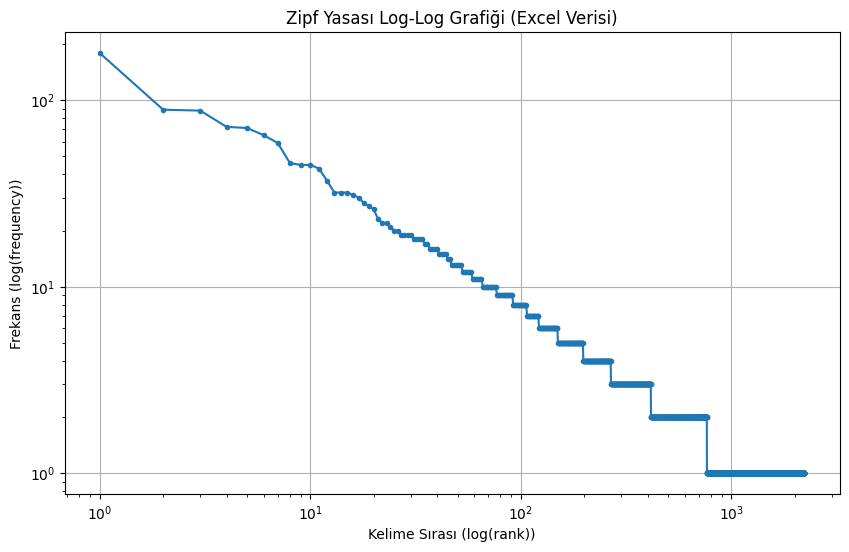

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Veriyi okuma
df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/dataset-lyrics-musics-mini.csv")


# singer_name sütununu al, NaN olanları çıkar ve string'e çevir
sentences = df['musicaNome'].dropna().astype(str).tolist()

# Cümleleri küçük harfe çevir ve kelimelere ayır
corpus_lemmatized = [s.lower().split() for s in sentences]

# Tüm kelimeleri tek listeye topla
all_words = [word for sentence in corpus_lemmatized for word in sentence]

# Kelime frekanslarını hesapla
word_freq = Counter(all_words)

# Frekansları sırala (büyükten küçüğe)
sorted_freq = sorted(word_freq.values(), reverse=True)

# Kelime sırasını oluştur (ranks)
ranks = np.arange(1, len(sorted_freq) + 1)

# Log-log grafiği çizildi
plt.figure(figsize=(10,6))
plt.loglog(ranks, sorted_freq, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği (Excel Verisi)")
plt.xlabel("Kelime Sırası (log(rank))")
plt.ylabel("Frekans (log(frequency))")
plt.grid(True)
plt.show()

                0
0          Heroes
1         Starman
2    Space Oddity
3  Life On Mars ?
4     Modern Love


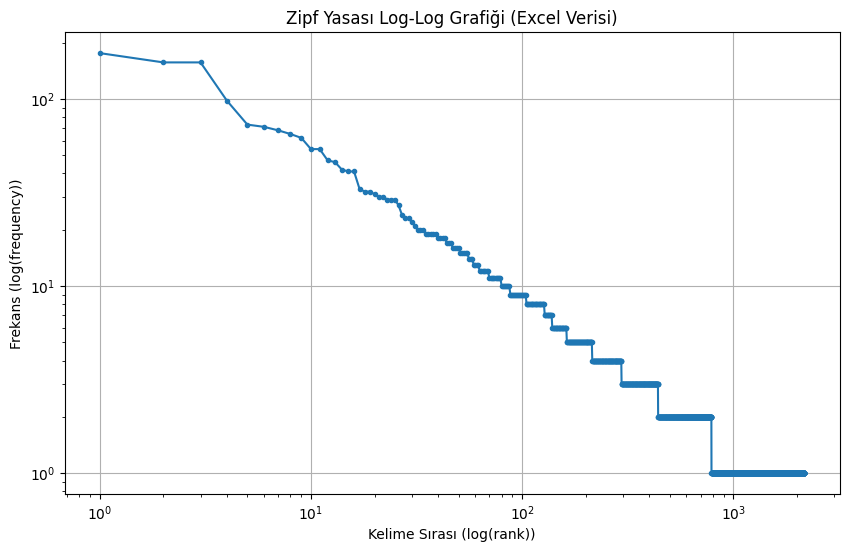

In [16]:

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_sentences .csv", header=None)

# Veri çerçevesinin ilk birkaç satırını görüntüler
print(df.head())

# Sütunları manuel olarak atayalım
df.columns = ['sentence']

# Tüm cümleleri birleştir ve kelimelere ayırır
all_words = " ".join(df["sentence"].dropna()).split()

# Kelime frekanslarını hesaplar
word_freq = Counter(all_words)

# Frekansları azalan şekilde sıralar
sorted_freq = sorted(word_freq.values(), reverse=True)

# Rank (sıra) verisi oluşturur
ranks = range(1, len(sorted_freq) + 1)

# Log-log grafiği çizer
plt.figure(figsize=(10,6))
plt.loglog(ranks, sorted_freq, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği (Excel Verisi)")
plt.xlabel("Kelime Sırası (log(rank))")
plt.ylabel("Frekans (log(frequency))")
plt.grid(True)
plt.show()


                               0
0      cest beau de fair un show
1   perdu davanc par gad elmaleh
2          dont let lone tonight
3  dismoi monsieur gordon cooper
4                       ouvertur


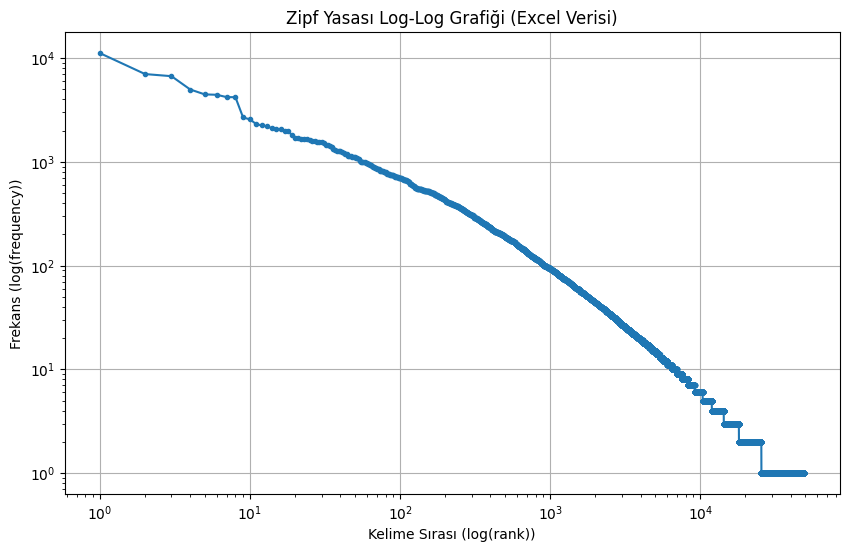

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_sentences .csv", header=None)

# Veri çerçevesinin ilk birkaç satırını görüntüler
print(df.head())

# Sütunları manuel olarak atayalım
df.columns = ['sentence']

# Tüm cümleleri birleştir ve kelimelere ayırır
all_words = " ".join(df["sentence"].dropna()).split()

# Kelime frekanslarını hesaplar
word_freq = Counter(all_words)

# Frekansları azalan şekilde sıralar
sorted_freq = sorted(word_freq.values(), reverse=True)

# Rank (sıra) verisi oluşturur
ranks = range(1, len(sorted_freq) + 1)

# Log-log grafiği çizer
plt.figure(figsize=(10,6))
plt.loglog(ranks, sorted_freq, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği (Excel Verisi)")
plt.xlabel("Kelime Sırası (log(rank))")
plt.ylabel("Frekans (log(frequency))")
plt.grid(True)
plt.show()

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# CSV dosyasını oku
df_lemma = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_sentences .csv", header=None)
lemmatized_texts = df_lemma[0].astype(str).tolist()

# TF-IDF vektörleştirici - en fazla 5000 kelime, İngilizce stopword'leri çıkar
vectorizer_lemma = TfidfVectorizer(max_features=5000, stop_words='english')

# TF-IDF matrisini oluştur
tfidf_matrix_lemma = vectorizer_lemma.fit_transform(lemmatized_texts)

# Özellik adlarını al ve DataFrame oluştur
feature_names_lemma = vectorizer_lemma.get_feature_names_out()
tfidf_df_lemma = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix_lemma, columns=feature_names_lemma)

# İlk 5 satırı yazdır (kontrol amaçlı)
print(tfidf_df_lemma.head())

# Sadece ilk 1000 satırı CSV’ye kaydet (test için)
tfidf_df_lemma.head(1000).to_csv("tfidf_lemmatized_5000.csv", index=False, encoding="utf-8-sig")


   15  16  1882  1980  1984  1997  1st  200  2016  2nd  ...  yvonne  zero  \
0   0   0     0     0     0     0    0    0     0    0  ...       0     0   
1   0   0     0     0     0     0    0    0     0    0  ...       0     0   
2   0   0     0     0     0     0    0    0     0    0  ...       0     0   
3   0   0     0     0     0     0    0    0     0    0  ...       0     0   
4   0   0     0     0     0     0    0    0     0    0  ...       0     0   

   zeroes  ziggy  zona  zone  zoo  ángeles  ão  és  
0       0      0     0     0    0        0   0   0  
1       0      0     0     0    0        0   0   0  
2       0      0     0     0    0        0   0   0  
3       0      0     0     0    0        0   0   0  
4       0      0     0     0    0        0   0   0  

[5 rows x 1895 columns]


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# CSV dosyasını oku
df_stem = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_sentences .csv", header=None)
lemmatized_texts = df_lemma[0].astype(str).tolist()

# TF-IDF vektörleştirici - en fazla 5000 kelime, İngilizce stopword'leri çıkar
vectorizer_lemma = TfidfVectorizer(max_features=5000, stop_words='english')

# TF-IDF matrisini oluştur
tfidf_matrix_lemma = vectorizer_lemma.fit_transform(lemmatized_texts)

# Özellik adlarını al ve DataFrame oluştur
feature_names_lemma = vectorizer_lemma.get_feature_names_out()
tfidf_df_lemma = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix_lemma, columns=feature_names_lemma)

# İlk 5 satırı yazdır (kontrol amaçlı)
print(tfidf_df_lemma.head())

# Sadece ilk 1000 satırı CSV’ye kaydet (test için)
tfidf_df_lemma.head(1000).to_csv("tfidf_lemmatized_5000.csv", index=False, encoding="utf-8-sig")


   15  16  1882  1980  1984  1997  1st  200  2016  2nd  ...  yvonne  zero  \
0   0   0     0     0     0     0    0    0     0    0  ...       0     0   
1   0   0     0     0     0     0    0    0     0    0  ...       0     0   
2   0   0     0     0     0     0    0    0     0    0  ...       0     0   
3   0   0     0     0     0     0    0    0     0    0  ...       0     0   
4   0   0     0     0     0     0    0    0     0    0  ...       0     0   

   zeroes  ziggy  zona  zone  zoo  ángeles  ão  és  
0       0      0     0     0    0        0   0   0  
1       0      0     0     0    0        0   0   0  
2       0      0     0     0    0        0   0   0  
3       0      0     0     0    0        0   0   0  
4       0      0     0     0    0        0   0   0  

[5 rows x 1895 columns]


In [33]:
import pandas as pd
from gensim.models import Word2Vec

df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_sentences .csv", header=None, dtype=str)
sentences = df[0].dropna().astype(str).tolist()
corpus_lemmatized = [s.lower().split() for s in sentences]

 #PARAMETRELER
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]
# MODEL EĞİTİM VE KAYIT
def train_and_save_model(corpus, params):
    model = Word2Vec(
        corpus,
        vector_size=params['vector_size'],
        window=params['window'],
        min_count=1,
        sg=1 if params['model_type'] == 'skipgram' else 0
    )
    name = f"lemmatized_model_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model"
    model.save(name)
    print(f"{name} saved.")

# Modelleri eğit ve kaydet
for param in parameters:
    train_and_save_model(corpus_lemmatized, param)

# 3 örnek model yükle
model_1 = Word2Vec.load("lemmatized_model_cbow_window2_dim100.model")
model_2 = Word2Vec.load("lemmatized_model_skipgram_window4_dim100.model")
model_3 = Word2Vec.load("lemmatized_model_skipgram_window2_dim300.model")

# Benzer kelimeleri yazdıran fonksiyon
def print_similar_words(model, model_name):
    try:
        similar = model.wv.most_similar('david-bowie', topn=3)
        print(f"\n{model_name} Modeli - 'david-bowie' ile En Benzer 3 Kelime:")
        for word, score in similar:
           print(f"Kelime: {word}, Benzerlik Skoru: {score}")
    except KeyError:
        print(f"\n{model_name}: 'david-bowie' kelimesi bu modelde yok.")

# Sonuçları göster
print_similar_words(model_1, "Lemmatized CBOW Window 2 Dim 100")
print_similar_words(model_2, "Stemmed Skipgram Window 4 Dim 100")
print_similar_words(model_3, "Lemmatized Skipgram Window 2 Dim 300")


lemmatized_model_cbow_window2_dim100.model saved.
lemmatized_model_skipgram_window2_dim100.model saved.
lemmatized_model_cbow_window4_dim100.model saved.
lemmatized_model_skipgram_window4_dim100.model saved.
lemmatized_model_cbow_window2_dim300.model saved.
lemmatized_model_skipgram_window2_dim300.model saved.
lemmatized_model_cbow_window4_dim300.model saved.
lemmatized_model_skipgram_window4_dim300.model saved.

Lemmatized CBOW Window 2 Dim 100: 'david-bowie' kelimesi bu modelde yok.

Stemmed Skipgram Window 4 Dim 100: 'david-bowie' kelimesi bu modelde yok.

Lemmatized Skipgram Window 2 Dim 300: 'david-bowie' kelimesi bu modelde yok.


In [34]:
import pandas as pd
from gensim.models import Word2Vec

# Stemmed veriyi oku
df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_sentences .csv", header=None, dtype=str)
sentences = df[0].dropna().astype(str).tolist()
corpus_stemmed = [s.lower().split() for s in sentences]

# PARAMETRELER (dokunmadım)
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]

# MODEL EĞİTİM VE KAYIT
def train_and_save_model(corpus, params):
    model = Word2Vec(
        corpus,
        vector_size=params['vector_size'],
        window=params['window'],
        min_count=1,
        sg=1 if params['model_type'] == 'skipgram' else 0
    )
    name = f"stemmed_model_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model"
    model.save(name)
    print(f"{name} saved.")

# Tüm modelleri eğit ve kaydet
for param in parameters:
    train_and_save_model(corpus_stemmed, param)

# Örnek 3 modeli yükle
model_1 = Word2Vec.load("stemmed_model_cbow_window2_dim100.model")
model_2 = Word2Vec.load("stemmed_model_skipgram_window4_dim100.model")
model_3 = Word2Vec.load("stemmed_model_skipgram_window2_dim300.model")

# Kelime örneği (veri setinde olduğuna emin olduğun bir şey yaz, örnek: 'love')
sample_word = "love"

# Benzer kelimeleri yazdır
def print_similar_words(model, model_name):
    try:
        similar = model.wv.most_similar(sample_word, topn=3)
        print(f"\n{model_name} - '{sample_word}' kelimesine en benzer 3 kelime:")
        for word, score in similar:
            print(f"Kelime: {word}, Benzerlik Skoru: {score:.4f}")
    except KeyError:
        print(f"\n{model_name}: '{sample_word}' kelimesi modelde yok.")

# Sonuçları yazdır
print_similar_words(model_1, "Stemmed CBOW Window 2 Dim 100")
print_similar_words(model_2, "Stemmed Skipgram Window 4 Dim 100")
print_similar_words(model_3, "Stemmed Skipgram Window 2 Dim 300")


stemmed_model_cbow_window2_dim100.model saved.
stemmed_model_skipgram_window2_dim100.model saved.
stemmed_model_cbow_window4_dim100.model saved.
stemmed_model_skipgram_window4_dim100.model saved.
stemmed_model_cbow_window2_dim300.model saved.
stemmed_model_skipgram_window2_dim300.model saved.
stemmed_model_cbow_window4_dim300.model saved.
stemmed_model_skipgram_window4_dim300.model saved.

Stemmed CBOW Window 2 Dim 100 - 'love' kelimesine en benzer 3 kelime:
Kelime: actin, Benzerlik Skoru: 0.9247
Kelime: everyth, Benzerlik Skoru: 0.9234
Kelime: treat, Benzerlik Skoru: 0.9204

Stemmed Skipgram Window 4 Dim 100 - 'love' kelimesine en benzer 3 kelime:
Kelime: might, Benzerlik Skoru: 0.8647
Kelime: smile, Benzerlik Skoru: 0.8635
Kelime: prais, Benzerlik Skoru: 0.8626

Stemmed Skipgram Window 2 Dim 300 - 'love' kelimesine en benzer 3 kelime:
Kelime: prais, Benzerlik Skoru: 0.8995
Kelime: fight, Benzerlik Skoru: 0.8977
Kelime: women, Benzerlik Skoru: 0.8970


In [ ]:
#//////////////////////////////////////////////////////2.RAPOR KISMI/////////////////////////////////////////////////////////////////////////////////

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Veri setini oku (örneğin: lemmatized veri)
df = pd.read_csv("lemmatized_sentences.csv", header=None)
df.columns = ["sentence"]
sentences = df["sentence"].astype(str).tolist()

# TF-IDF vektörleştirici (maks 5000 kelimeyle sınırlı)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sentences)

# Örnek giriş cümlesi (veri setinden alınmış bir satır)
query = "i feel like i m drowning in your love"

# Giriş cümlesini TF-IDF ile vektörleştir
query_vec = vectorizer.transform([query])

# Kosinüs benzerlik hesapla
cosine_similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()

# En benzer 5 cümleyi bul
top_indices = cosine_similarities.argsort()[-5:][::-1]
print("En benzer 5 cümle:\n")
for idx in top_indices:
    print(f"{idx}: {sentences[idx]} (Benzerlik: {cosine_similarities[idx]:.3f})")


En benzer 5 cümle:

1656: Love At First Feel (Benzerlik: 0.800)
1465: Like You (Benzerlik: 0.599)
1375: You 'll Never Find Another Love Like Mine (Benzerlik: 0.555)
182: I Feel Free (Benzerlik: 0.478)
492: And I Love Her (Benzerlik: 0.443)


In [19]:
import pandas as pd

# Örnek: lemmatize edilmiş veri seti
df = pd.read_csv("lemmatized_sentences.csv", header=None)
df.columns = ['sentence']  # Kolon ismini ekle


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. Veri setini oku (her satır bir şarkı cümlesi)
df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_sentences .csv", header=None)  # Eğer sütun ismi yoksa header=None
sentences = df[0].astype(str).tolist()  # sütun 0'ı listeye alıyoruz

# 2. TF-IDF vectorizer oluştur, max 5000 kelime ile sınırla
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sentences)

# 3. Giriş cümlesini seçmek için, örneğin "Life On Mars ?" içeren satırın indeksini bulabiliriz
entry_sentence = "Life On Mars ?"
try:
    entry_index = sentences.index(entry_sentence)  # Cümlenin indeksini bul
except ValueError:
    print("Giriş cümlesi veri setinde bulunamadı.")
    entry_index = 0  # alternatif olarak 0. satırı al

print(f"Giriş Cümlesi ({entry_index}): {sentences[entry_index]}")

# 4. Giriş cümlesinin TF-IDF vektörünü hesapla
entry_vec = vectorizer.transform([sentences[entry_index]])

# 5. Giriş cümlesi ile tüm cümleler arasındaki cosine benzerliğini hesapla
similarities = cosine_similarity(entry_vec, tfidf_matrix).flatten()

# 6. En yüksek benzerliğe sahip 5 cümlenin indekslerini bul (kendi cümlesi hariç)
similar_indices = similarities.argsort()[::-1]  # büyükten küçüğe sırala
top_5_indices = [idx for idx in similar_indices if idx != entry_index][:5]

# 7. Sonuçları yazdır
print("\nEn benzer 5 cümle:")
for idx in top_5_indices:
    print(f"{idx}: {sentences[idx]} (Benzerlik: {similarities[idx]:.3f})")


Giriş Cümlesi (3): Life On Mars ?

En benzer 5 cümle:
239: Life On Mars ? (Benzerlik: 1.000)
913: Venus And Mars (Benzerlik: 0.517)
639: Got To Get You Into My Life (Benzerlik: 0.468)
915: Venus and Mars / Rock Show (Benzerlik: 0.462)
1377: Bring Me To Life (Benzerlik: 0.448)


In [31]:
import pandas as pd

# Metin sütunu isimleri 
lemmatized_df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_sentences .csv", header=None)
stemmed_df = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_sentences .csv", header=None)

lemmatized_sentences = lemmatized_df[0].astype(str).tolist()
stemmed_sentences = stemmed_df[0].astype(str).tolist()

print(f"Lemmatized cümle sayısı: {len(lemmatized_sentences)}")
print(f"Stemmed cümle sayısı: {len(stemmed_sentences)}")


Lemmatized cümle sayısı: 1748
Stemmed cümle sayısı: 259287


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Lemmatized cümleler için
tfidf_lem = vectorizer.fit_transform(lemmatized_sentences)

# Stemmed cümleler için
tfidf_stem = vectorizer.fit_transform(stemmed_sentences)

# Giriş cümlesi örneği (örneğin 3. cümle)
entry_index = 3

def find_top5_similar(tfidf_matrix, sentences, entry_idx):
    entry_vec = tfidf_matrix[entry_idx]
    similarities = cosine_similarity(entry_vec, tfidf_matrix).flatten()
    similar_indices = similarities.argsort()[::-1]
    # Kendi cümlesini çıkar
    top_5_indices = [i for i in similar_indices if i != entry_idx][:5]
    results = [(idx, sentences[idx], similarities[idx]) for idx in top_5_indices]
    return results

# Lemmatized için
top5_lem = find_top5_similar(tfidf_lem, lemmatized_sentences, entry_index)
print("Lemmatized TF-IDF en benzer 5 cümle:")
for idx, sent, sim in top5_lem:
    print(f"{idx}: {sent} (Benzerlik: {sim:.3f})")

# Stemmed için
top5_stem = find_top5_similar(tfidf_stem, stemmed_sentences, entry_index)
print("\nStemmed TF-IDF en benzer 5 cümle:")
for idx, sent, sim in top5_stem:
    print(f"{idx}: {sent} (Benzerlik: {sim:.3f})")


Lemmatized TF-IDF en benzer 5 cümle:
239: Life On Mars ? (Benzerlik: 1.000)
913: Venus And Mars (Benzerlik: 0.517)
639: Got To Get You Into My Life (Benzerlik: 0.468)
915: Venus and Mars / Rock Show (Benzerlik: 0.462)
1377: Bring Me To Life (Benzerlik: 0.448)

Stemmed TF-IDF en benzer 5 cümle:
91: dismoi monsieur bernard minet (Benzerlik: 0.809)
231901: rifleman cooper (Benzerlik: 0.587)
100275: jp cooper (Benzerlik: 0.587)
59078: monsieur bill (Benzerlik: 0.550)
219385: allô allô monsieur lordinateur (Benzerlik: 0.550)


In [107]:
from gensim.models import Word2Vec
import pandas as pd

# CSV dosyalarını oku
df_lemmatized = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_sentences .csv")
df_stemmed = pd.read_csv("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_sentences .csv")

# Sütun kontrolü
df_lemmatized.columns = ["Heroes"]
df_stemmed.columns = ["Heroes"]


# TF-IDF modelini eğit
tfidf_lemmatized = TfidfVectorizer()
tfidf_lemmatized = tfidf_lemmatized.fit(df_lemmatized["Heroes"].astype(str))
# Word2Vec modellerini yükle
w2v_models = {}
try:
    w2v_models['lemmatized_model_cbow_window2_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_cbow_window2_dim100.model")
    w2v_models['lemmatized_model_cbow_window2_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_cbow_window2_dim300 (1).model")
    w2v_models['lemmatized_model_cbow_window4_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_cbow_window4_dim100.model")
    w2v_models['lemmatized_model_cbow_window4_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_cbow_window4_dim300.model")
    w2v_models['lemmatized_model_skipgram_window2_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_skipgram_window2_dim100.model")
    w2v_models['lemmatized_model_skipgram_window2_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_skipgram_window2_dim300.model")
    w2v_models['lemmatized_model_skipgram_window4_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_skipgram_window4_dim100.model")
    w2v_models['lemmatized_model_skipgram_window4_dim300'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/lemmatized_model_skipgram_window4_dim300 (1).model")

    w2v_models['stemmed_model_cbow_window2_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_cbow_window2_dim100.model")
    
    model_path = r"C:\Users\ZüMeYrA\OneDrive\Desktop\stemmed_model_cbow_window2_dim300\stemmed_model_cbow_window2_dim300.model"
    w2v_models['stemmed_model_cbow_window2_dim300'] = Word2Vec.load(model_path)

    w2v_models['stemmed_model_cbow_window4_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_cbow_window4_dim100.model")
    
    model_path = r"C:\Users\ZüMeYrA\OneDrive\Desktop\stemmed_model_cbow_window4_dim300.model\stemmed_model_cbow_window4_dim300.model"
    w2v_models['stemmed_model_cbow_window4_dim300'] = Word2Vec.load(model_path)
    
    w2v_models['stemmed_model_skipgram_window2_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_skipgram_window2_dim100.model")
    
    model_path = r"C:\Users\ZüMeYrA\OneDrive\Desktop\stemmed_model_skipgram_window2_dim300.mode\stemmed_model_skipgram_window2_dim300.model"
    w2v_models['stemmed_model_skipgram_window2_dim300.'] = Word2Vec.load(model_path)
    
    
    w2v_models['stemmed_model_skipgram_window4_dim100'] = Word2Vec.load("C:/Users/ZüMeYrA/OneDrive/Desktop/stemmed_model_skipgram_window4_dim100.model")
    
    model_path = r"C:\Users\ZüMeYrA\OneDrive\Desktop\stemmed_model_skipgram_window4_dim300.mode\stemmed_model_skipgram_window4_dim300.model"
    w2v_models['stemmed_model_skipgram_window4_dim300.'] = Word2Vec.load(model_path)
       

except FileNotFoundError as e:
    print("Model dosyası bulunamadı:", e)
except Exception as e:
    print("Bir hata oluştu:", e)    


In [112]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Ön işlem: küçük harfe çevir, noktalama kaldır, boşlukla ayır
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    return tokens

# TF-IDF için benzerlik (cosine similarity)
def get_tfidf_similarities(tfidf_model, corpus_texts, query_text):
    # TF-IDF vektörü oluştur
    tfidf_corpus = tfidf_model.transform(corpus_texts)
    tfidf_query = tfidf_model.transform([query_text])
    # Kosinüs benzerliği (dot product) hesapla
    sim_scores = (tfidf_corpus * tfidf_query.T).toarray().flatten()
    return sim_scores

# Word2Vec için en benzer 5 metin ve skorları
def get_w2v_similarities(model, corpus_texts, query_text, topn=5):
    query_tokens = preprocess_text(query_text)
    sims = []
    for i, text in enumerate(corpus_texts):
        tokens = preprocess_text(text)
        try:
            sim = model.wv.n_similarity(query_tokens, tokens)
        except KeyError:
            sim = 0  # kelime modelde yoksa sıfır benzerlik
        sims.append((i, sim))
    sims = sorted(sims, key=lambda x: x[1], reverse=True)
    return sims[:topn]

# Örnek kullanım:

# Veri setindeki metinler
texts = df_lemmatized["Heroes"].astype(str).tolist()  # ya da df_stemmed["Heroes"]

# TF-IDF modeli önceden fit edildi varsayalım
# Örneğin tfidf_lemmatized ya da tfidf_stemmed

# Arama metni
query_text = "Starman"

# TF-IDF skorları
tfidf_scores = get_tfidf_similarities(tfidf_lemmatized, texts, query_text)
top5_tfidf_idx = np.argsort(tfidf_scores)[::-1][:5]

print("TF-IDF Modeli için en benzer 5 metin ve skorları:")
for idx in top5_tfidf_idx:
    print(f"Metin: {texts[idx]}, Benzerlik Skoru: {tfidf_scores[idx]:.4f}")

# Word2Vec modeli seç (örneğin lemmatized_model_cbow_window2_dim100)
model = w2v_models['lemmatized_model_cbow_window2_dim100']

top5_w2v = get_w2v_similarities(model, texts, query_text, topn=5)
print("\nWord2Vec Modeli için en benzer 5 metin:")
for i, sim in top5_w2v:
    print(f"Metin: {texts[i]}, Benzerlik Skoru: {sim:.4f}")


TF-IDF Modeli için en benzer 5 metin ve skorları:
Metin: Starman, Benzerlik Skoru: 1.0000
Metin: Starman, Benzerlik Skoru: 1.0000
Metin: Early Days, Benzerlik Skoru: 0.0000
Metin: Demon 's Dance, Benzerlik Skoru: 0.0000
Metin: Country Dreamer, Benzerlik Skoru: 0.0000

Word2Vec Modeli için en benzer 5 metin:
Metin: Starman, Benzerlik Skoru: 1.0000
Metin: Starman, Benzerlik Skoru: 1.0000
Metin: Inside Thing - Feat Lulu, Benzerlik Skoru: 0.2981
Metin: Big Jack, Benzerlik Skoru: 0.2671
Metin: Going Under, Benzerlik Skoru: 0.2668


In [113]:
import pandas as pd

# Örnek veriler 
tfidf_results = [
    ("Starman", 1.0000),
    ("Starman", 1.0000),
    ("Early Days", 0.0000),
    ("Demon 's Dance", 0.0000),
    ("Country Dreamer", 0.0000),
]

w2v_results = [
    ("Starman", 1.0000),
    ("Starman", 1.0000),
    ("Inside Thing - Feat Lulu", 0.2981),
    ("Big Jack", 0.2671),
    ("Going Under", 0.2668),
]

# TF-IDF sonuçlarını DataFrame'e çevir
df_tfidf = pd.DataFrame(tfidf_results, columns=["Metin", "Benzerlik Skoru"])
df_tfidf["Model"] = "TF-IDF"

# Word2Vec sonuçlarını DataFrame'e çevir
df_w2v = pd.DataFrame(w2v_results, columns=["Metin", "Benzerlik Skoru"])
df_w2v["Model"] = "Word2Vec"

# İki sonucu birleştir
df_all = pd.concat([df_tfidf, df_w2v], ignore_index=True)

# 
df_all = df_all.sort_values(by=["Model", "Benzerlik Skoru"], ascending=[True, False])

print(df_all)


                      Metin  Benzerlik Skoru     Model
0                   Starman           1.0000    TF-IDF
1                   Starman           1.0000    TF-IDF
2                Early Days           0.0000    TF-IDF
3            Demon 's Dance           0.0000    TF-IDF
4           Country Dreamer           0.0000    TF-IDF
5                   Starman           1.0000  Word2Vec
6                   Starman           1.0000  Word2Vec
7  Inside Thing - Feat Lulu           0.2981  Word2Vec
8                  Big Jack           0.2671  Word2Vec
9               Going Under           0.2668  Word2Vec


In [116]:
import pandas as pd
import numpy as np

# Örnek df_all
# df_all = pd.DataFrame({
#    'Model': [...],
#    'Metin': [...],
#    'Sıra': [...]
# })

models = df_all['Model'].unique()

# Model -> ilk 5 metin seti sözlüğü
top5_dict = {}

for model in df_all['Model'].unique():
    subset = df_all[df_all['Model'] == model]
    top5_metins = subset['Metin'].head(5).tolist()
    top5_dict[model] = set(top5_metins)



In [119]:
!pip install seaborn


In [115]:
print(df_all.columns)


Index(['Metin', 'Benzerlik Skoru', 'Model'], dtype='object')


In [126]:
print(df_all['Model'].unique())


['TF-IDF' 'Word2Vec']


In [145]:
import pandas as pd
import gensim
import os
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

input_word = "love"

# Veri setlerini oku
lemmatized_df = pd.read_csv("lemmatized_sentences.csv")
stemmed_df = pd.read_csv("stemmed_sentences.csv")

# Model dosyalarını listele
model_files = [f for f in os.listdir() if f.endswith(".model")]

top5_results = {}

# Her bir model için işlemleri yap
for model_file in model_files:
    print(f"İşleniyor: {model_file}")
    model = gensim.models.Word2Vec.load(model_file)

    # Hangi veri seti kullanılacak?
    if "lemmatized" in model_file:
        df = lemmatized_df
        text_column = "Heroes"
    else:
        df = stemmed_df
        text_column = "hero"

    # Cümle vektörlerini hesapla
    sentence_vectors = []
    valid_indices = []

    for i, sentence in enumerate(df[text_column]):
        if not isinstance(sentence, str):
            continue
        words = sentence.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            sentence_vector = np.mean(word_vectors, axis=0)
            sentence_vectors.append(sentence_vector)
            valid_indices.append(i)

    # Modelde input_word var mı kontrol et
    if input_word not in model.wv:
        print(f"{input_word} kelimesi {model_file} içinde yok.")
        continue

    # Benzerlikleri hesapla
    input_vector = model.wv[input_word].reshape(1, -1)
    similarities = cosine_similarity(input_vector, sentence_vectors)[0]
    top_indices = np.argsort(similarities)[::-1][:5]
    top_ids = [valid_indices[i] for i in top_indices]

    # Sonuçları kaydet
    model_name = model_file.replace(".model", "")
    top5_results[model_name] = top_ids

# TF-IDF sonuçlarını manuel olarak ekle
top5_results["tfidf_lemmatized"] = [239, 913, 639, 915, 1377]
top5_results["tfidf_stemmed"] = [91, 231901, 100275, 59078, 219385]

# Sonuçları yazdır
print("\nModel Bazlı En Benzer 5 Cümle ID'si:")
for model, ids in top5_results.items():
    print(f"{model}: {ids}")


İşleniyor: lemmatized_model_cbow_window2_dim100.model
İşleniyor: lemmatized_model_cbow_window2_dim300.model
İşleniyor: lemmatized_model_cbow_window4_dim100.model
İşleniyor: lemmatized_model_cbow_window4_dim300.model
İşleniyor: lemmatized_model_skipgram_window2_dim100.model
İşleniyor: lemmatized_model_skipgram_window2_dim300.model
İşleniyor: lemmatized_model_skipgram_window4_dim100.model
İşleniyor: lemmatized_model_skipgram_window4_dim300.model
İşleniyor: stemmed_model_cbow_window2_dim100.model
İşleniyor: stemmed_model_cbow_window2_dim300.model
İşleniyor: stemmed_model_cbow_window4_dim100.model
İşleniyor: stemmed_model_cbow_window4_dim300.model
İşleniyor: stemmed_model_skipgram_window2_dim100.model
İşleniyor: stemmed_model_skipgram_window2_dim300.model
İşleniyor: stemmed_model_skipgram_window4_dim100.model
İşleniyor: stemmed_model_skipgram_window4_dim300.model

Model Bazlı En Benzer 5 Cümle ID'si:
lemmatized_model_cbow_window2_dim100: [926, 692, 1147, 832, 456]
lemmatized_model_cbow_win

In [148]:
# Jaccard benzerliği hesaplayan fonksiyon
def jaccard_similarity(list1, list2):
    set1, set2 = set(list1), set(list2)
    intersection = set1 & set2
    union = set1 | set2
    if not union:
        return 0.0
    return len(intersection) / len(union)

# Jaccard benzerlik matrisini hesapla
model_names = list(top5_results.keys())
jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names, dtype=float)

for model1 in model_names:
    for model2 in model_names:
        jaccard_score = jaccard_similarity(top5_results[model1], top5_results[model2])
        jaccard_matrix.loc[model1, model2] = round(jaccard_score, 4)

# Ekrana yazdır
print("\nJaccard Benzerlik Matrisi:")
print(jaccard_matrix)

# Excel'e kaydet 
jaccard_matrix.to_excel("jaccard_similarity_matrix.xlsx")



Jaccard Benzerlik Matrisi:
                                          lemmatized_model_cbow_window2_dim100  \
lemmatized_model_cbow_window2_dim100                                    1.0000   
lemmatized_model_cbow_window2_dim300                                    0.0000   
lemmatized_model_cbow_window4_dim100                                    0.6667   
lemmatized_model_cbow_window4_dim300                                    0.0000   
lemmatized_model_skipgram_window2_dim100                                0.6667   
lemmatized_model_skipgram_window2_dim300                                0.0000   
lemmatized_model_skipgram_window4_dim100                                0.4286   
lemmatized_model_skipgram_window4_dim300                                0.0000   
stemmed_model_cbow_window2_dim100                                       0.0000   
stemmed_model_cbow_window2_dim300                                       0.0000   
stemmed_model_cbow_window4_dim100                                     